In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import copy
import random as random
from itertools import chain
import matplotlib.pyplot as plt

## OLD MODEL (Ignore)

Range: 0.06-0.1  Actual: 0.0  N= 17
Range: 0.1-0.15  Actual: 0.11  N= 19
Range: 0.15-0.19  Actual: 0.0  N= 22
Range: 0.19-0.24  Actual: 0.08  N= 24
Range: 0.24-0.28  Actual: 0.15  N= 34
Range: 0.28-0.33  Actual: 0.13  N= 52
Range: 0.33-0.37  Actual: 0.22  N= 81
Range: 0.37-0.41  Actual: 0.3  N= 60
Range: 0.41-0.46  Actual: 0.21  N= 72
Range: 0.46-0.5  Actual: 0.3  N= 70
Range: 0.5-0.55  Actual: 0.55  N= 44
Range: 0.55-0.59  Actual: 0.58  N= 33
Range: 0.59-0.64  Actual: 0.57  N= 21
Range: 0.64-0.68  Actual: 0.79  N= 19
Range: 0.68-0.73  Actual: 0.78  N= 9
Range: 0.73-0.77  Actual: 1.0  N= 4
Range: 0.77-0.82  Actual: 0.67  N= 6
Range: 0.82-0.86  Actual: 1.0  N= 2
Cost: 0.331904497605385


,Player 1,Player 2,elo,Wins,Loses,Games
Team,,,,,,
Double Clutch,Fredric Hinkle,Rahul Murthy,1874,25,3,28
Sloppy Seconds,Travis Core,Gabe Finocchi,1833,21,3,24
Assistive Touch,Clark Marshall,Craig Hammon,1809,14,0,14
Gold Diggers,Garrett Hornok,Kyle Ackermann,1797,8,3,11
Ritto Boys,Coleman Epperson,Ryder Rivadeneyra,1783,16,4,20
Volley Llamas,Joe Bondi,William Picone,1699,7,4,11
Boysterous,Preston Bies,Caleb Heck,1669,10,3,13
Knotty,Ryan Fitzgerald,Jarratt Rouse,1655,12,6,18
Outside Smoke,Noah Luskus,Grant Laughlin,1640,15,8,23


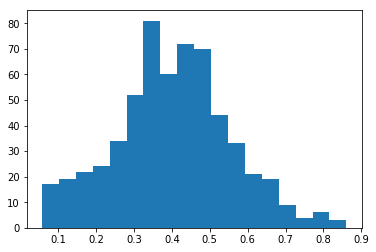

In [7]:
# # def create_teams_new(file,starting_elo=1500):
# #     tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
# #     team_dict={}
        
# #     tab["elo"]=[starting_elo] * len(tab)
# #     tab["Wins"]=[0]*len(tab)
# #     tab["Loses"]=[0]*len(tab)
# #     player_array=list(tab["Player 1"])+list(tab["Player 2"])
# #     elos=[starting_elo] * len(player_array)
# #     player_dict=players_dict = dict(zip(player_array, elos))
    
# #     return tab,player_dict

# # def team_elo(player1,player2,p_dict):
# #     return(p_dict[player1]+p_dict[player2])/2
# # def recalc_team_elos(stand,p_dict):
# #     for index, row in stand.iterrows():
# #         stand.at[index,"elo"]=team_elo(row["Player 1"],row["Player 2"],p_dict)
# #     return stand
# # def create_teams(file,p_dict,tab,starting_elo=1500):
# #     temp_tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
# #     player_array=list(temp_tab["Player 1"])+list(temp_tab["Player 2"])
# #     for player in player_array:
# #         if player in p_dict:
# #             pass
# #         else:
# #             p_dict[player]=starting_elo
# #     new_teams=list(set(temp_tab.index)-set(tab.index))
# #     temp_tab  = temp_tab[temp_tab.index.isin(new_teams)]
    
# #     temp_tab["elo"]=[starting_elo] * len(temp_tab)
# #     temp_tab["Wins"]=[0]*len(temp_tab)
# #     temp_tab["Loses"]=[0]*len(temp_tab)
# #     tab=tab.append(temp_tab)
# #     tab=recalc_team_elos(tab,p_dict)
# #     return tab,p_dict
    

# # def calculate_win_prob(elo1,elo2):
# #     return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (elo1 - elo2) / 400))

# # def record_game(team1,team2,winner,stand,p_dict,k=30):
# #     player1=stand.at[team1,"Player 1"]
# #     player2=stand.at[team1,"Player 2"]
# #     player3=stand.at[team2,"Player 1"]
# #     player4=stand.at[team2,"Player 2"]
    
# #     elo1=stand.at[team1,"elo"]
# #     elo2=stand.at[team2,"elo"]
# #     #prob team 2 wins
# #     cutoff=calculate_win_prob(elo1,elo2)
    
# #     if (winner == team1) :
# #         loser= team2
# #         delo1 = k * (1 - (1-cutoff))
# #         delo2 = k * (0 -(cutoff))
  
# #     # Case -2 When team2 wins
# #     # Updating the Elo Ratings
# #     else :
# #         loser =team1
# #         delo1 = k * (0 - (1-cutoff))
# #         delo2 = k * (1 - (cutoff))
        
# #     stand.at[winner,"Wins"]+=1
# #     stand.at[loser,"Loses"]+=1     
# #     # Save elos
# #     stand.at[team1,"elo"] +=delo1
# #     stand.at[team2,"elo"] +=delo2
# #     p_dict[player1]+= delo1
# #     p_dict[player2]+= delo1
# #     p_dict[player3]+= delo2
# #     p_dict[player4]+= delo2

# #     #print(winner + " beat "+ loser)
# #     return stand,p_dict

# # def Update_played(played_games,stand,p_dict):
# #     for index,row in played_games.iterrows():
# #             stand, p_dict=record_game(row["Team 1"],row["Team 2"],row["Winner"],stand,p_dict)
# #     stand=stand.sort_values("elo",ascending=False)
# #     return stand,p_dict
# # def record_tourney(file,p_dict=[],tab=[]):
# #     if p_dict==[]:
# #         tab,p_dict=create_teams_new(file,starting_elo=1500)
# #     else:
# #         tab,p_dict=create_teams(file,p_dict,tab,starting_elo=1500)
# #     games=pd.read_excel(file+".xlsx",sheet_name="Games",header=0)
# #     tab,p_dict=Update_played(games,tab,p_dict)
# #     return tab,p_dict
# # tab,p_dict=record_tourney("Winter Haven")
# # tab,p_dict=record_tourney("Garland",p_dict,tab)
# # tab,p_dict=record_tourney("Erie",p_dict,tab)
# # tab,p_dict=record_tourney("Rock Hill",p_dict,tab)
# # tab,p_dict=record_tourney("Seatlle",p_dict,tab)
# # tab,p_dict=record_tourney("New England",p_dict,tab)
# # tab,p_dict=record_tourney("Salt Lake City",p_dict, tab)
# # tab,p_dict=record_tourney("Chicago",p_dict,tab)
# # tab,p_dict=record_tourney("Richmond",p_dict,tab)
# # tab,p_dict=record_tourney("Mission Viejo",p_dict,tab)
# # tab["Games"]=tab["Wins"]+tab["Loses"]
# # #tab[tab["Games"]>10]
# # #tab
# # dict(sorted(p_dict.items(), key=lambda item: item[1]))
# # #for i in sorted (p_dict.keys()) :
# #      #print(i, end = " \n")
# # #values =list(p_dict.values())
# # #sum(values)/len(values)
# # #np.histogram(values)
# # #plt.hist(x=values, bins='auto')




# # def check_bins(games):
# #     bins=plt.hist(x=games["prob"], bins='auto')[1]
# #     n=[]
# #     actual=[]
# #     cost=0
# #     for i in range(len(bins)-1):
# #         sub=games[(games["prob"]>=bins[i])&(games["prob"]<bins[i+1])]
# #         middle=(bins[i]+bins[i+1])/2
# #         actual.append(sum(sub["Win"])/len(sub))
# #         cost+=(((sum(sub["Win"])/len(sub))-middle))**2
# #         n.append(len(sub))
# #         print("Range: "+ str(round(bins[i],2))+ "-" +str(round(bins[i+1],2))+ "  Actual: " + str(round(actual[i],2))+ "  N= " +str(n[i]))
# #     print("Cost: "+str(cost))
# # check_bins(no_1st)

# # def create_teams_new_p(file,starting_elo=1500):
# #     tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
# #     team_dict={}
        
# #     tab["elo"]=[starting_elo] * len(tab)
# #     tab["Wins"]=[0]*len(tab)
# #     tab["Loses"]=[0]*len(tab)
# #     player_array=list(tab["Player 1"])+list(tab["Player 2"])
# #     elos=[starting_elo] * len(player_array)
# #     player_dict=players_dict = dict(zip(player_array, elos))
    
# #     return tab,player_dict


# def calculate_win_prob(elo1,elo2):
#     return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (elo1 - elo2) / 400))

# def record_game_prob(team1,team2,winner,stand,p_dict,temp_games,index,k=30):
#     player1=stand.at[team1,"Player 1"]
#     player2=stand.at[team1,"Player 2"]
#     player3=stand.at[team2,"Player 1"]
#     player4=stand.at[team2,"Player 2"]
    
#     if p_dict[player1]==1500 or p_dict[player2]==1500 or p_dict[player3]==1500 or p_dict[player4]==1500:
#         temp_games.at[index,"New Player"]=True
#     avg=p_dict[player1]
#     avg+=p_dict[player2]
#     avg+=p_dict[player3]
#     avg+=p_dict[player4]
#     temp_games.at[index,"Avg Elo"]=avg/4
    
#     elo1=stand.at[team1,"elo"]
#     elo2=stand.at[team2,"elo"]
#     #prob team 2 wins
#     cutoff=calculate_win_prob(elo1,elo2)

    
#     if (winner == team1) :
#         loser= team2
#         delo1 = k * (1 - (1-cutoff))
#         delo2 = k * (0 -(cutoff))
#         temp_games.at[index,"Win"]= False
#     # Case -2 When team2 wins
#     # Updating the Elo Ratings
#     else :
#         loser =team1
#         delo1 = k * (0 - (1-cutoff))
#         delo2 = k * (1 - (cutoff))
        
#     stand.at[winner,"Wins"]+=1
#     stand.at[loser,"Loses"]+=1     
#     # Save elos
#     stand.at[team1,"elo"] +=delo1
#     stand.at[team2,"elo"] +=delo2
#     p_dict[player1]+= delo1
#     p_dict[player2]+= delo1
#     p_dict[player3]+= delo2
#     p_dict[player4]+= delo2
    
#     temp_games.at[index,"prob"]=cutoff
#     #print(winner + " beat "+ loser)
#     return stand,p_dict,temp_games

# def Update_played_prob(played_games,stand,p_dict,temp_games):
#     for index,row in played_games.iterrows():
#             stand, p_dict,temp_games=record_game_prob(row["Team 1"],row["Team 2"],row["Winner"],stand,p_dict,temp_games,index,k=45)    
#     stand=stand.sort_values("elo",ascending=False)
#     return stand,p_dict,temp_games
# def record_tourney_prob(file,p_dict=[],tab=[],games=[]):
#     if p_dict==[]:
#         games=pd.DataFrame()
#         tab,p_dict=create_teams_new(file,starting_elo=1500)
#     else:
#         tab,p_dict=create_teams(file,p_dict,tab,starting_elo=1500)
#     temp_games=pd.read_excel(file+".xlsx",sheet_name="Games",header=0)
#     temp_games["prob"]=[0.00]*len(temp_games)
#     temp_games["Win"]=[True]*len(temp_games)
#     temp_games["New Player"]=[False]*len(temp_games)
#     temp_games["Avg Elo"]=[0]*len(temp_games)
#     tab,p_dict,temp_games=Update_played_prob(temp_games,tab,p_dict,temp_games)
#     games=games.append(temp_games,ignore_index=True)
#     return tab,p_dict,games
# tab,p_dict,games=record_tourney_prob("Winter Haven")
# tab,p_dict,games=record_tourney_prob("Garland",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Erie",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Rock Hill",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Seatlle",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("New England",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Salt Lake City",p_dict, tab,games)
# tab,p_dict,games=record_tourney_prob("Chicago",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Richmond",p_dict,tab,games)
# tab,p_dict,games=record_tourney_prob("Mission Viejo",p_dict,tab,games)
# #print("Max: " + str(max(win_probs)))
# #print("Min: " +str(min(win_probs)))

# #bins=(np.histogram(win_probs)[1])
# no_1st=games[games["New Player"]==False]
# print(max(games["Avg Elo"]))
# print(min(games["Avg Elo"]))
# dict(sorted(p_dict.items(), key=lambda item: item[1]))
# #check_bins(no_1st)

# #working version with basic cost/player objects
# class Player:
#     def __init__(self, name,tournies=[],games=0, elo=1500):
#         self.name = name
#         self.elo = elo
#         self.games=games
#         self.tournies=tournies
        
#     def update_elo(self,expected):
#         if self.games <= 5:
#             k=100
#         else:
#             k=40
#         self.elo+= k * expected
#         self.games+=1     
#     def add_tounrey(self,tourney):
#         self.tournies.append(tourney)
    
# def create_teams_new(file,starting_elo=1500):
#     tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
#     team_dict={}
        
#     tab["elo"]=[starting_elo] * len(tab)
#     tab["Wins"]=[0]*len(tab)
#     tab["Loses"]=[0]*len(tab)
#     player_array=list(tab["Player 1"])+list(tab["Player 2"])
#     object_array=[]
#     for player in player_array:
#         object_array.append(Player(player,elo=starting_elo))
    
#     player_dict=players_dict = dict(zip(player_array, object_array))
#     return tab,player_dict
# def team_elo_obj(player1,player2,p_dict):
#     return(player1.elo+player2.elo)/2
# def recalc_team_elos_obj(stand,p_dict):
#     for index, row in stand.iterrows():
#         stand.at[index,"elo"]=team_elo_obj(p_dict[row["Player 1"]],p_dict[row["Player 2"]],p_dict)
#     return stand
# def create_teams(file,p_dict,tab,starting_elo=1500):
#     temp_tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
#     player_array=list(temp_tab["Player 1"])+list(temp_tab["Player 2"])
#     for player in player_array:
#         if player in p_dict:
#             pass
#         else:
#             p_dict[player]=Player(player,elo=starting_elo)
#     new_teams=list(set(temp_tab.index)-set(tab.index))
#     temp_tab  = temp_tab[temp_tab.index.isin(new_teams)]
    
#     temp_tab["elo"]=[starting_elo] * len(temp_tab)
#     temp_tab["Wins"]=[0]*len(temp_tab)
#     temp_tab["Loses"]=[0]*len(temp_tab)
#     tab=tab.append(temp_tab)
#     tab=recalc_team_elos_obj(tab,p_dict)
#     return tab,p_dict

# def record_game_obj(team1,team2,winner,stand,p_dict,temp_games,index,k=30):
#     player1=p_dict[stand.at[team1,"Player 1"]]
#     player2=p_dict[stand.at[team1,"Player 2"]]
#     player3=p_dict[stand.at[team2,"Player 1"]]
#     player4=p_dict[stand.at[team2,"Player 2"]]
#     players=[player1,player2,player3,player4]
    
#     for player in players:
#         if player.games==0:
#             temp_games.at[index,"New Player"]=True
        
#     avg=0
#     for player in players:
#         avg+=player.elo
    
#     temp_games.at[index,"Avg Elo"]=avg/4
    
#     elo1=stand.at[team1,"elo"]
#     elo2=stand.at[team2,"elo"]
#     #prob team 2 wins
#     cutoff=calculate_win_prob(elo1,elo2)
    
#     if (winner == team1) :
#         loser= team2
#         player1.update_elo((1 - (1-cutoff)))
#         player2.update_elo((1 - (1-cutoff)))
#         player3.update_elo((0 -(cutoff)))
#         player4.update_elo((0 -(cutoff)))
#         temp_games.at[index,"Win"]= False
#     # Case -2 When team2 wins
#     # Updating the Elo Ratings
#     else :
#         loser =team1
#         player1.update_elo((0 - (1-cutoff)))
#         player2.update_elo((0 - (1-cutoff)))
#         player3.update_elo((1 - (cutoff)))
#         player4.update_elo((1 - (cutoff)))
        
#     stand.at[winner,"Wins"]+=1
#     stand.at[loser,"Loses"]+=1     
#     # Save elos
#     stand.at[team1,"elo"] =team_elo_obj(player1,player2,p_dict)
#     stand.at[team2,"elo"] =team_elo_obj(player3,player4,p_dict)
    
#     temp_games.at[index,"prob"]=cutoff
#     #print(winner + " beat "+ loser)
#     return stand,p_dict,temp_games
# def Update_played_prob(played_games,stand,p_dict,temp_games):
    
#     for index,row in played_games.iterrows():
#             stand, p_dict,temp_games=record_game_obj(row["Team 1"],row["Team 2"],row["Winner"],stand,p_dict,temp_games,index,k=45)    
#     stand=stand.sort_values("elo",ascending=False)
#     return stand,p_dict,temp_games
# def record_tourney_prob(file,p_dict=[],tab=[],games=[]):
#     if p_dict==[]:
#         games=pd.DataFrame()
#         tab,p_dict=create_teams_new(file,starting_elo=1500)
#     else:
#         tab,p_dict=create_teams(file,p_dict,tab,starting_elo=1500)
#     temp_games=pd.read_excel(file+".xlsx",sheet_name="Games",header=0)
#     temp_games["prob"]=[0.00]*len(temp_games)
#     temp_games["Win"]=[True]*len(temp_games)
#     temp_games["New Player"]=[False]*len(temp_games)
#     temp_games["Avg Elo"]=[0]*len(temp_games)
#     tab,p_dict,temp_games=Update_played_prob(temp_games,tab,p_dict,temp_games)
#     games=games.append(temp_games,ignore_index=True)
#     return tab,p_dict,games
# #tab,p_dict,games=record_tourney_prob("Winter Haven")
# #tab,p_dict,games=record_tourney_prob("Garland",p_dict,tab,games)
# def play_season(tourneys):
#     tab,p_dict,games=record_tourney_prob(tourneys[0])
#     for tourney in tourneys[1:len(tourneys)]:
#         tab,p_dict,games=record_tourney_prob(tourney,p_dict,tab,games)
        
#     return tab,p_dict,games
# tourneys=["Winter Haven","Garland","Erie","Rock Hill","Seatlle", "New England","Salt Lake City","Chicago","Richmond","Mission Viejo"]
# tab,p_dict,games=play_season(tourneys)
# players=list(p_dict.values())
# players.sort(key=lambda x: x.elo)
# #for player in players:
#     #print(""+player.name + ": " +str(player.elo) +" Games: "+ (str(player.games)))
# check_bins(games)
# tab["Games"]=tab["Wins"]+tab["Loses"]
# tab[tab["Games"]>10]

## Working Model

Range: 0.01-0.11  Actual: 0.0  N= 15
Range: 0.11-0.21  Actual: 0.25  N= 16
Range: 0.21-0.3  Actual: 0.28  N= 32
Range: 0.3-0.4  Actual: 0.35  N= 43
Range: 0.4-0.5  Actual: 0.34  N= 29
Range: 0.5-0.6  Actual: 0.63  N= 43
Range: 0.6-0.7  Actual: 0.68  N= 31
Range: 0.7-0.8  Actual: 0.73  N= 33
Range: 0.8-0.9  Actual: 0.9  N= 21
Range: 0.9-1.0  Actual: 0.87  N= 15
Cost: 0.04109275889132739
Connor Prelich: 797.7432705280844 Games: 38
David Gonzales: 803.6928738006505 Games: 30
Bryce Wagoner: 944.0905196819726 Games: 11
Olivia Jenki: 1090.7935229157451 Games: 11
Ian Slattery: 1096.4765340645486 Games: 9
Bryce Young: 1100.1412775720137 Games: 8
Josh Wheadon: 1101.0180806392314 Games: 5
AJ Hutchinson: 1129.8990007089628 Games: 10
Ian Tinman: 1142.4090086219474 Games: 6
Brooks Anderson: 1142.4090086219474 Games: 6
John Shurance: 1160.5895158132787 Games: 4
Schon Siguenza: 1160.5895158132787 Games: 4
Archie Powell: 1163.455844551478 Games: 4
Jack Granger: 1163.455844551478 Games: 4
Dylan Bricker

,Player 1,Player 2,elo,Wins,Loses,Games
Double Clutch,Fredric Hinkle,Rahul Murthy,2214.784535,31.0,3.0,34.0
Ritto Boys,Coleman Epperson,Ryder Rivadeneyra,2087.301488,22.0,5.0,27.0
Assistive Touch,Clark Marshall,Craig Hammon,2071.200261,19.0,2.0,21.0
Sloppy Seconds,Travis Core,Gabe Finocchi,2023.144736,24.0,4.0,28.0
Gold Diggers,Garrett Hornok,Kyle Ackermann,1967.443743,10.0,5.0,15.0
Volley Llamas,Joe Bondi,William Picone,1946.796056,10.0,6.0,16.0
Boysterous,Preston Bies,Caleb Heck,1881.659509,13.0,7.0,20.0
Hilltop Spikes,Cole Model,Max Model,1854.167626,14.0,6.0,20.0
Foote/Oswalt,Warren Foote,Ryan Oswalt,1851.710057,11.0,6.0,17.0
Outside Smoke,Noah Luskus,Grant Laughlin,1817.385062,17.0,11.0,28.0


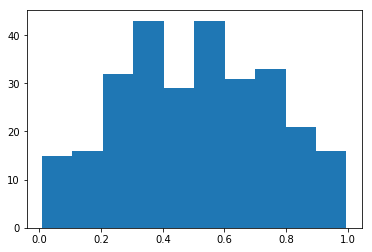

In [8]:
#working varible values of k1,k2,n

#Setting up the player object that will hold stats on the individual player
class Player:
    def __init__(self, name,tournies=[],games=0, elo=1500):
        self.name = name
        self.elo = elo
        self.games=games
        self.tournies=tournies
        
        
    def add_tounrey(self,tourney):
        self.tournies.append(tourney)
        
# Calculates the probability of team 2 winning the mathc given the starting elos
def calculate_win_prob(elo1,elo2):
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (elo1 - elo2) / 400))
        
#Function to update a players elo after a game. Player is object, expected is the calculated win prob based on elos
#k1/k2 are parameters specifying how fast elo changes. N is the number of games the introductory period lasts
def update_elo(player,expected,k1,k2,n):
        #determine which k to use
        if player.games <= n:
            k=k1
        else:
            k=k2
        player.elo+= k * expected
        player.games+=1      
        
# This reads in team info for the very first tournmanet and creates the table in which team records/info is stored
def create_teams_new(file,starting_elo=1500):
    # Reads in Data
    tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
    
    # Establish baseline values for each team   
    tab["elo"]=[starting_elo] * len(tab)
    tab["Wins"]=[0]*len(tab)
    tab["Loses"]=[0]*len(tab)
    
    #Create list of the names of all players in the tournamnet
    player_array=list(tab["Player 1"])+list(tab["Player 2"])
    
    #Create new player object for each player in the tournament and assign them the starting elo
    object_array=[]
    for player in player_array:
        object_array.append(Player(player,elo=starting_elo))
        
    #Create the player dictionary where the player objects are stored
    player_dict= dict(zip(player_array, object_array))
    return tab,player_dict

# Calculates the teams elo based on the two players elos
def team_elo_obj(player1,player2,p_dict):
    return(player1.elo+player2.elo)/2

# Recalculates the elo of everyteam based on the new player dictionary. Designed to be used after each tournament
def recalc_team_elos_obj(stand,p_dict):
    for index, row in stand.iterrows():
        stand.at[index,"elo"]=team_elo_obj(p_dict[row["Player 1"]],p_dict[row["Player 2"]],p_dict)
    return stand

#Creates teams for 2nd+ tournament and returns a table that has the running team data and creates object for all new players
def create_teams(file,p_dict,tab,starting_elo=1500):
    temp_tab=pd.read_excel(file+".xlsx",sheet_name="Teams",header=0,index_col=0)
    
    #Gets list of all players
    player_array=list(temp_tab["Player 1"])+list(temp_tab["Player 2"])
    #Checks if player already exists, if not creates a new object for them
    for player in player_array:
        if player in p_dict:
            pass
        else:
            p_dict[player]=Player(player,elo=starting_elo)
    
    #Finds which teams are new and filters the table down to just new teams
    new_teams=list(set(temp_tab.index)-set(tab.index))
    temp_tab  = temp_tab[temp_tab.index.isin(new_teams)]
    
    #Adds default values to new teams
    temp_tab["elo"]=[starting_elo] * len(temp_tab)
    temp_tab["Wins"]=[0]*len(temp_tab)
    temp_tab["Loses"]=[0]*len(temp_tab)
    
    #Adds on new teams to running team table
    tab=tab.append(temp_tab)
    
    #Recalculates the elos of all teams in case player played on other team
    tab=recalc_team_elos_obj(tab,p_dict)
    
    return tab,p_dict

#How each game played is added to the systen.
def record_game_obj(team1,team2,winner,stand,p_dict,temp_games,index,k1,k2,ng):
   #Pulls the player object of those in the game
    player1=p_dict[stand.at[team1,"Player 1"]]
    player2=p_dict[stand.at[team1,"Player 2"]]
    player3=p_dict[stand.at[team2,"Player 1"]]
    player4=p_dict[stand.at[team2,"Player 2"]]
    players=[player1,player2,player3,player4]            
    
    #Calculates the average elo for the match and the minimum number of games of any of the players in the match
    #Used for quality control purposes
    avg=0
    min_games=[]
    for player in players:
        avg+=player.elo
        min_games.append(player.games)
        
    #Adds this information to the game dataframe
    temp_games.at[index,"Avg Elo"]=avg/4
    temp_games.at[index,"Min Games"]=min(min_games)
    
    #pulls the elo of the team from the standings dataframe
    elo1=stand.at[team1,"elo"]
    elo2=stand.at[team2,"elo"]
    
    
    #prob team 2 wins
    cutoff=calculate_win_prob(elo1,elo2)
    
    #Case if team 1 wins
    if (winner == team1) :
        loser= team2
        # Updating the Elo Ratings
        update_elo(player1,((1 - (1-cutoff))),k1,k2,ng)
        update_elo(player2,((1 - (1-cutoff))),k1,k2,ng)
        update_elo(player3,(0 - (cutoff)),k1,k2,ng)
        update_elo(player4,(0 - (cutoff)),k1,k2,ng)
        temp_games.at[index,"Win"]= False
        
    # Case if team 2 wins
    
    else :
        loser =team1
        # Updating the Elo Ratings
        update_elo(player1,((0 - (1-cutoff))),k1,k2,ng)
        update_elo(player2,((0 - (1-cutoff))),k1,k2,ng)
        update_elo(player3,(1 - (cutoff)),k1,k2,ng)
        update_elo(player4,(1 - (cutoff)),k1,k2,ng)
        #Win defaluts to false
    
    #updates win lose in the standings file
    stand.at[winner,"Wins"]+=1
    stand.at[loser,"Loses"]+=1     
    
    # Save the updated elo for the team
    stand.at[team1,"elo"] =team_elo_obj(player1,player2,p_dict)
    stand.at[team2,"elo"] =team_elo_obj(player3,player4,p_dict)
    
    #saves win prob to games df
    temp_games.at[index,"prob"]=cutoff
    return stand,p_dict,temp_games

# Function that plays each of the games
def Update_played_prob(played_games,stand,p_dict,temp_games,k1,k2,ng):
    
    for index,row in played_games.iterrows():
            stand, p_dict,temp_games=record_game_obj(row["Team 1"],row["Team 2"],row["Winner"],stand,p_dict,temp_games,index,k1,k2,ng)    
    stand=stand.sort_values("elo",ascending=False)
    return stand,p_dict,temp_games

#Randomly swaps team 1 and 2s postion randomly to combat bias as the favorite is listed first in fwango
def random_read_games(file):
    test=pd.read_excel(file+".xlsx",sheet_name="Games",header=0)
    test["Switch"]= np.random.randint(1,101,len(test))
    test[['Team 1','Team 2']] = test[['Team 2','Team 1']].where(test['Switch'] <=50, test[['Team 1','Team 2']].values)
    return(test[["Team 1", "Team 2","Winner"]])

#Plays an entire tournament including new team creation
def record_tourney_prob(file,k1,k2,ng,p_dict=[],tab=[],games=[]):
    if p_dict==[]:
        games=pd.DataFrame()
        tab,p_dict=create_teams_new(file,starting_elo=1500)
    else:
        tab,p_dict=create_teams(file,p_dict,tab,starting_elo=1500)
    temp_games=random_read_games(file)
    temp_games["prob"]=[0.00]*len(temp_games)
    temp_games["Win"]=[True]*len(temp_games)
    temp_games["Min Games"]=[0]*len(temp_games)
    temp_games["Avg Elo"]=[0]*len(temp_games)
    tab,p_dict,temp_games=Update_played_prob(temp_games,tab,p_dict,temp_games,k1,k2,ng)
    games=games.append(temp_games,ignore_index=True)
    return tab,p_dict,games

# Plays the whole season
def play_season(tourneys,k1,k2,ng):
    tab,p_dict,games=record_tourney_prob(tourneys[0],k1,k2,ng)
    for tourney in tourneys[1:len(tourneys)]:
        tab,p_dict,games=record_tourney_prob(tourney,k1,k2,ng,p_dict,tab,games)
    check_bins(games[games["Min Games"]>3])
    return tab,p_dict,games

# 1 method of checking costs
# Want to have 5% of games given 5% win change to be wins. But not enough data so I create bins and check
def check_bins(games):
    #generate bins ie 0.01-0.1 win prob
    bins=plt.hist(x=games["prob"], bins='auto')[1]
    n=[]
    actual=[]
    cost=0
    #for each bin check the percentage of games in that bin won. and find the difference between that and the middle of teh bin
    # then square the differnce to punish large diffence and keep cost postive. Then add accross all bins to get total cost
    for i in range(len(bins)-1):
        sub=games[(games["prob"]>=bins[i])&(games["prob"]<bins[i+1])]
        middle=(bins[i]+bins[i+1])/2
        actual.append(sum(sub["Win"])/len(sub))
        cost+=(((sum(sub["Win"])/len(sub))-middle))**2
        n.append(len(sub))
        print("Range: "+ str(round(bins[i],2))+ "-" +str(round(bins[i+1],2))+ "  Actual: " + str(round(actual[i],2))+ "  N= " +str(n[i]))
    print("Cost: "+str(cost))

#establish what tournaments to look over
tourneys=["Winter Haven","Garland","Erie","Rock Hill","Seatlle", "New England","Salt Lake City","Chicago","Richmond","Mission Viejo","Nationals"]
#previous values
#tab,p_dict,games=play_season(tourneys,k1=180,k2=90,ng=7)
#tab,p_dict,games=play_season(tourneys,k1=220,k2=90,ng=6)
#tab,p_dict,games=play_season(tourneys,k1=230,k2=60,ng=4)
tab,p_dict,games=play_season(tourneys,k1=210,k2=90,ng=7)
#tab,p_dict,games=play_season(tourneys,k1=200,k2=60,ng=6)

players=list(p_dict.values())
players.sort(key=lambda x: x.elo)
avg_elo=0
for player in players:
    print(""+player.name + ": " +str(player.elo) +" Games: "+ (str(player.games)))
    avg_elo+=player.elo
print("Avg_elo: "+str(avg_elo/len(players)))
print("Median_elo: " + str(players[round(len(players)/2)].elo))
tab["Games"]=tab["Wins"]+tab["Loses"]
tab[tab["Games"]>10]

In [ ]:
#Same concept as before but only save cost value not print/display histograms
def calc_cost(games):
    bins=plt.hist(x=games["prob"], bins='auto')[1]
    n=[]
    actual=[]
    cost=0
    for i in range(len(bins)-1):
        sub=games[(games["prob"]>=bins[i])&(games["prob"]<bins[i+1])]
        middle=(bins[i]+bins[i+1])/2
        if len(sub)==0:
            actual.append(0)
            cost+=(0-middle)**2
        else:
            actual.append(sum(sub["Win"])/len(sub))
            cost+=(((sum(sub["Win"])/len(sub))-middle))**2
        n.append(len(sub))
    return cost

#plays a season and stores total cost value for season
def play_season_tune(tourneys,k1,k2,ng,mg):
    tab,p_dict,games=record_tourney_prob(tourneys[0],k1,k2,ng)
    for tourney in tourneys[1:len(tourneys)]:
        tab,p_dict,games=record_tourney_prob(tourney,k1,k2,ng,p_dict,tab,games)
    cost=calc_cost(games[games["Min Games"]>mg])
    return cost

#Loop through potential values to find the best. mg= minimum number of games by any player.
#Used because model should not be punished for missing coin flips on new teams(Lots of new teams in data)
def find_best(k1s,k2s,ngs,mgs,tourneys):
    costs=[]
    k1out=[]
    k2out=[]
    ngOut=[]
    mgOut=[]
    it=0
    for k1 in k1s:
        for k2 in k2s:
            for ng in ngs:
                for mg in mgs:
                    costs.append(play_season_tune(tourneys,k1,k2,ng,mg))
                    k1out.append(k1)
                    k2out.append(k2)
                    ngOut.append(ng)
                    mgOut.append(mg)
                    it+=1
                    if it%10==0:
                        print("Iteration: " +str(it))
    out=pd.DataFrame()
    out["k1"]=k1out
    out["k2"]=k2out
    out["ng"]=ngOut
    out["mg"]=mgOut
    out["Cost"]=costs
    return out
k1s=range(150,250,10)
k2s=range(50,120,10)
ngs=range(4,8)
mgs=[1,2,3]
testsNg=find_best(k1s,k2s,ngs,mgs,tourneys)
testsNg

In [40]:
testsNg.sort_values("Cost")

,k1,k2,ng,mg,Cost
562,210,90,7,2,0.014833
401,190,100,5,3,0.016814
684,230,60,4,1,0.017234
589,220,50,4,2,0.017500
516,210,60,4,1,0.018091
755,230,110,7,3,0.018468
768,240,60,4,1,0.019327
837,240,110,7,1,0.019400
490,200,100,7,2,0.019415
759,240,50,5,1,0.019693


Coleman Epperson
Ryder Rivadeneyra
Gabe Finocchi
Fredric Hinkle
Craig Hammon
Rahul Murthy


[[1862.8733444241923,
  1926.4040390506425,
  1926.4040390506425,
  1923.3245909941556,
  1923.3245909941556,
  1923.3245909941556,
  1923.3245909941556,
  2027.789346453543,
  2018.0370502023102,
  2125.9167247490623,
  2197.3660973925344],
 [1500,
  1442.168185592444,
  1442.168185592444,
  1442.168185592444,
  1442.168185592444,
  1442.168185592444,
  1442.168185592444,
  1576.054755885693,
  1576.054755885693,
  1683.9344304324447,
  1755.3838030759166],
 [1500,
  1799.3673576888818,
  1863.4559551881239,
  1962.4139068739503,
  1942.351501060045,
  1942.351501060045,
  1967.964130122077,
  2046.3420288912387,
  2105.948739678776,
  2018.5881282420803,
  2019.797317291394],
 [1862.8733444241923,
  1912.7504704844673,
  1912.7504704844673,
  1872.9563223077828,
  2004.992725028045,
  2004.992725028045,
  2004.992725028045,
  1998.334676343631,
  1999.366029836925,
  1998.3145281438667,
  2083.819364457179],
 [1500,
  1989.0900380650492,
  1989.0900380650492,
  1949.2958898883646,
  

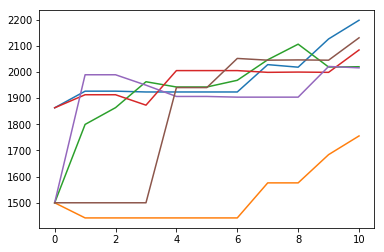

In [14]:
#Tracks players elo values over season and graphs results
def play_season_track(tourneys,players,k1,k2,ng):
    out=[]
    for player in players:
        out.append([])
    tab,p_dict,games=record_tourney_prob(tourneys[0],k1,k2,ng)
    for i, player in enumerate(players):
        if player in p_dict:
            out[i].append(p_dict[player].elo)
        else:
            out[i].append(1500)
    for tourney in tourneys[1:len(tourneys)]:
        tab,p_dict,games=record_tourney_prob(tourney,k1,k2,ng,p_dict,tab,games)
        for i, player in enumerate(players):
            if player in p_dict:
                out[i].append(p_dict[player].elo)
            else:
                out[i].append(1500)
    for i,player in enumerate(players):
        print(player)
        plt.plot(out[i],label = str(player) +"")
    return out
tourneys=["Winter Haven","Garland","Erie","Rock Hill","Seatlle", "New England","Salt Lake City","Chicago","Richmond","Mission Viejo","Nationals"]
out=play_season_track(tourneys,["Coleman Epperson","Ryder Rivadeneyra","Gabe Finocchi","Fredric Hinkle","Craig Hammon","Rahul Murthy"],200,60,6)
out


In [15]:
games.sort_values("prob",ascending= False)

,Team 1,Team 2,Winner,prob,Win,Min Games,Avg Elo
399,Uncrustables,Double Clutch,Double Clutch,0.984748,True,6,1662
324,Bavarian Jersey,Sloppy Seconds,Sloppy Seconds,0.984574,True,1,1585
336,Chowey,Sloppy Seconds,Sloppy Seconds,0.984221,True,1,1588
332,Trash Pandas,Double Clutch,Double Clutch,0.967589,True,13,1737
446,Meniscus,Double Clutch,Double Clutch,0.960857,True,9,1750
440,LukLeftBal,Long Tan,Long Tan,0.960202,True,3,1514
506,Box Models,Double Clutch,Double Clutch,0.957242,True,0,1753
163,I Pity the Fool,Sick Kick,Sick Kick,0.954573,True,1,1664
486,Zia,Gold Diggers,Gold Diggers,0.953309,True,0,1684
383,Bumpin Biscuits,Double Clutch,Double Clutch,0.952534,True,0,1760


0.0621251663627935

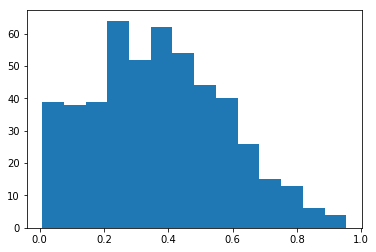

In [280]:
calc_cost(games[games["New Player"]==False])

In [114]:
len(games[(games["Min Games"]>=3) & (games["Avg Elo"]<=1500)])

112

In [44]:
games

,Team 1,Team 2,Winner,prob,Win,Min Games,Avg Elo
0,Knotty,Grassy,Knotty,0.500000,False,0,1500
1,1-2-4 Skyball,Slice the Mango,1-2-4 Skyball,0.500000,False,0,1500
2,cool hwhip,Cho & Chu,Cho & Chu,0.500000,True,0,1500
3,Power Sweep,Highly,Power Sweep,0.500000,False,0,1500
4,Knotty,Slice the Mango,Knotty,0.250917,False,1,1500
5,Grassy,1-2-4 Skyball,1-2-4 Skyball,0.749083,True,1,1500
6,Highly,Cho & Chu,Highly,0.749083,False,1,1500
7,Power Sweep,cool hwhip,cool hwhip,0.250917,True,1,1500
8,Knotty,1-2-4 Skyball,1-2-4 Skyball,0.500000,True,2,1642
9,Grassy,Slice the Mango,Grassy,0.500000,False,2,1357


Range: 0.02-0.12  Actual: 0.1  N= 10
Range: 0.12-0.23  Actual: 0.12  N= 17
Range: 0.23-0.34  Actual: 0.21  N= 19
Range: 0.34-0.45  Actual: 0.19  N= 16
Range: 0.45-0.56  Actual: 0.43  N= 14
Range: 0.56-0.66  Actual: 0.62  N= 24
Range: 0.66-0.77  Actual: 0.8  N= 20
Range: 0.77-0.88  Actual: 0.87  N= 15
Range: 0.88-0.99  Actual: 0.9  N= 20
Cost: 0.06762579255090256
Kenna Clark: 1072.2395351354896 Games: 6
Grace Bruno: 1072.2395351354896 Games: 6
Moragn Mitchell: 1105.1336671015454 Games: 5
Kelly Field: 1105.1336671015454 Games: 5
Becky Shapiro: 1110.313454610807 Games: 7
Eve Farrell: 1110.313454610807 Games: 7
Julie Orozco: 1129.4103630969585 Games: 6
Aunalisa Harriosn: 1129.4103630969585 Games: 6
Claire Barnwell: 1152.1756340936522 Games: 5
Damaris Attanasio: 1152.1756340936522 Games: 5
Morgan Mitchell: 1171.637217994362 Games: 5
Victoria Stewart: 1172.7446238330433 Games: 6
Alicia Trujilo: 1172.7446238330433 Games: 6
Haley Bennett: 1176.6628775436945 Games: 4
Lydia Penix: 1181.457930956

,Player 1,Player 2,elo,Wins,Loses,Games
Team,,,,,,
TWINZ,Olivia Jenki,Ali Jenki,2265,19,0,19
Graham/Rogers,Becca Graham,Alli Rogers,2127,24,3,27
THUS Parabatai,Kayla Wu,Kalin Miramontes,2068,27,7,34
Zoomies,Karah Hui,Allie Foster,1955,16,10,26
Showalter/Shrock,Ashley Showalter,Krista Shrock,1824,9,9,18
Feller/Pierson,Katie Pierson,Kierstie Feller,1786,9,6,15
Rally Cats,Sarah Allen,Tori Farlow,1719,16,11,27
Butter,Mey Helm,Perrin York,1459,7,13,20


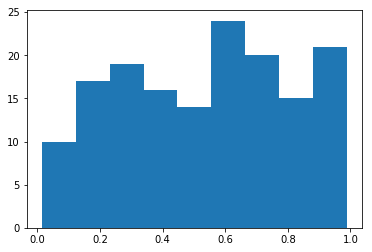

In [10]:
#Womens
tourneys_w=["Garland_W","Erie_W","Rock Hill_W","Seatlle_W","Salt Lake City_W","Chicago_W","Richmond_W","Mission Viejo_W","Nationals_W"]
#tab,p_dict,games=play_season(tourneys,k1=180,k2=90,ng=7)
#tab,p_dict,games=play_season(tourneys,k1=220,k2=90,ng=6)
#tab,p_dict,games=play_season(tourneys,k1=230,k2=60,ng=4)
tab_w,p_dict_w,games_w=play_season(tourneys_w,k1=230,k2=110,ng=5)
players_w=list(p_dict_w.values())
players_w.sort(key=lambda x: x.elo)
avg_elo=0
for player in players_w:
    print(""+player.name + ": " +str(player.elo) +" Games: "+ (str(player.games)))
    avg_elo+=player.elo
print("Avg_elo: "+str(avg_elo/len(players_w)))
print("Median_elo: " + str(players_w[round(len(players_w)/2)].elo))
tab_w["Games"]=tab_w["Wins"]+tab_w["Loses"]
tab_w[tab_w["Games"]>10]

In [ ]:
k1s=range(150,250,10)
k2s=range(50,120,10)
ngs=range(4,8)
mgs=[1,2,3]
testsNg_w=find_best(k1s,k2s,ngs,mgs,tourneys_w)
testsNg_w.sort_values("Cost")

In [71]:
games_w.sort_values("prob",ascending= False)

,Team 1,Team 2,Winner,prob,Win,Min Games,Avg Elo
288,Butter,TWINZ,TWINZ,0.987567,True,21,1800
121,Tulip,Vigna/Crete,Vigna/Crete,0.984834,True,6,1474
262,Butter,Totes Magoats,Totes Magoats,0.983111,True,17,1740
282,Crimson Zia,TWINZ,TWINZ,0.980216,True,0,1839
267,Running with Scissors,Graham/Rogers,Graham/Rogers,0.976175,True,2,1777
290,WHAM,Graham/Rogers,Graham/Rogers,0.972280,True,1,1793
306,Spiked Punch,Zoomies,Zoomies,0.970190,True,3,1685
250,Ambulating Amigas,Totes Magoats,Totes Magoats,0.970023,True,0,1774
305,Crimson Zia,Gougeon/Pierson,Gougeon/Pierson,0.969347,True,3,1553
22,Mighty Icy,Graham/Rogers,Graham/Rogers,0.968303,True,3,1500


Katie Pierson
Olivia Jenki
Ali Jenki
Kalin Miramontes
Becca Graham


[[1640.148078740827,
  1833.4225905944286,
  1999.1562320609796,
  1966.0993141618867,
  1981.4894582558532,
  2140.321436230404,
  2042.9003340180063,
  2152.375485297182,
  2162.466344064838],
 [2015.1601497069921,
  2015.1601497069921,
  2015.1601497069921,
  2015.1601497069921,
  2112.872051110768,
  2091.5346745764477,
  2091.5346745764477,
  2201.009825855623,
  2279.7371096732895],
 [2015.1601497069921,
  2015.1601497069921,
  2015.1601497069921,
  2015.1601497069921,
  2112.872051110768,
  2271.704029085319,
  2271.704029085319,
  2125.6370090002647,
  2204.364292817931],
 [1680.5403005949245,
  1680.5403005949245,
  1680.5403005949245,
  1908.636957389912,
  1966.8026478514735,
  2021.7015147090817,
  2021.7015147090817,
  1929.4684069908324,
  2075.1488220487613],
 [1879.4759239350658,
  1879.4759239350658,
  1879.4759239350658,
  1879.4759239350658,
  1879.4759239350658,
  1879.4759239350658,
  2013.612595770366,
  2081.128733881332,
  2109.644148055054]]

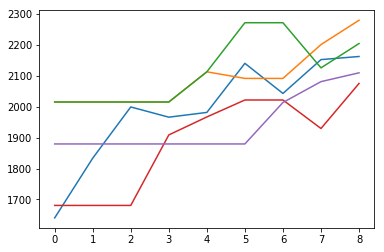

In [72]:
out=play_season_track(tourneys_w,["Katie Pierson","Olivia Jenki","Ali Jenki","Kalin Miramontes","Becca Graham"],230,100,5)
out

In [ ]:
#Second cost assement. Taks every inddividual game/Squarres the difference between the expected value( Prob of winning) and
# the actual (1 for win and 0 for loss) Squares the cost to further punish large outliers
def calc_cost_expected(games1,mg):
    games1=games1.loc[games1["Min Games"]>=mg]
    return(sum(((games1["prob"]-games1["Win"]*1)*2)**2)/len(games1))

#Sameasa before but with new cost function
def play_season_tune_exp(tourneys,k1,k2,ng,mg):
    tab,p_dict,games=record_tourney_prob(tourneys[0],k1,k2,ng)
    for tourney in tourneys[1:len(tourneys)]:
        tab,p_dict,games=record_tourney_prob(tourney,k1,k2,ng,p_dict,tab,games)
    cost=calc_cost_expected(games,mg)
    return cost

def find_best_exp(k1s,k2s,ngs,mgs,tourneys):
    costs=[]
    k1out=[]
    k2out=[]
    ngOut=[]
    mgOut=[]
    it=0
    for k1 in k1s:
        for k2 in k2s:
            for ng in ngs:
                for mg in mgs:
                    costs.append(play_season_tune_exp(tourneys,k1,k2,ng,mg))
                    k1out.append(k1)
                    k2out.append(k2)
                    ngOut.append(ng)
                    mgOut.append(mg)
                    it+=1
                    if it%10==0:
                        print("Iteration: " +str(it))
    out=pd.DataFrame()
    out["k1"]=k1out
    out["k2"]=k2out
    out["ng"]=ngOut
    out["mg"]=mgOut
    out["Cost"]=costs
    return out
k1s=range(110,230,10)
k2s=range(50,120,10)
ngs=range(4,8)
mgs=[2,3]
testsNg_exp=find_best_exp(k1s,k2s,ngs,mgs,tourneys)
testsNg_exp

In [26]:
calc_cost_expected(games,3)


0.7595391163695993

In [27]:
testsNg_exp.sort_values("Cost")

,k1,k2,ng,mg,Cost
517,200,60,6,3,0.746438
461,190,60,6,3,0.746653
573,210,60,6,3,0.746670
509,200,50,6,3,0.746874
453,190,50,6,3,0.747018
405,180,60,6,3,0.747074
397,180,50,6,3,0.747098
565,210,50,6,3,0.747165
629,220,60,6,3,0.747214
469,190,70,6,3,0.747336
